<a href="https://colab.research.google.com/github/yuukun123/Python/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# Tùy chỉnh để hiển thị biểu đồ đẹp hơn
sns.set(style="whitegrid")

Mounted at /content/drive


In [3]:
# Đường dẫn file
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DelawarePainDatabase_SecondaryDatabase_FaceGenCharacterization.xlsx"
xls = pd.ExcelFile(file_path)

# **clean DelawarePainDatabase_SecondaryDatabase_FaceGenCharacterization.xlsx**

hàm lọc dữ liệu sheet ExpressionAverage


In [ ]:
# def clean_expression_sheet(df, required_cols=["Expression"]):
#     # Xóa cột không tên
#     df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

#     # Xóa dòng thiếu cột bắt buộc
#     df = df.dropna(subset=required_cols)

#     # Loại bỏ các biểu cảm không dùng
#     df = df[~df["Expression"].str.lower().str.contains("pms13")]
#     df = df[~df["Expression"].str.lower().str.contains("facegenpro_avgblackface")]

#     # Các cột cần ép kiểu và xử lý NaN
#     numeric_cols = ["ThreatRating", "ConfusionRating", "ThreatComp", "ConfusionComp"]
#     for col in numeric_cols:
#         if col in df.columns:
#             df[col] = df[col].replace([".", ""], np.nan)
#             df[col] = pd.to_numeric(df[col], errors="coerce")
#             df[col] = df[col].fillna(df[col].mean())

#     # Loại bỏ các dòng liên quan face gen pro
#     df = df[~df["Norming Survey"].str.lower().str.contains("facegenpro")]

#     df = df.infer_objects(copy=False)

#     return df


In [18]:
def clean_expression_sheet(df, required_cols=["Expression"]):
  # Xóa cột không tên
  df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

  # Xóa dòng thiếu cột bắt buộc
  df = df.dropna(subset=required_cols)

  # Loại bỏ các biểu cảm không dùng
  df = df[~df["Expression"].str.lower().str.contains("pms13")]
  df = df[~df["Expression"].str.lower().str.contains("facegenpro_avgblackface")]

  # ✅ Loại bỏ các dòng liên quan face gen pro TRƯỚC để không ảnh hưởng đến mean
  df = df[~df["Norming Survey"].str.lower().str.contains("facegenpro")]

  # Các cột cần ép kiểu và xử lý NaN
  numeric_cols = ["ThreatRating", "ConfusionRating", "ThreatComp", "ConfusionComp"]
  for col in numeric_cols:
      if col in df.columns:
          df[col] = df[col].replace([".", ""], np.nan)
          df[col] = pd.to_numeric(df[col], errors="coerce")
          df[col] = df[col].fillna(df[col].mean())

  df = df.loc[:, ~df.columns.str.contains("ConfusionRating")]
  df = df.loc[:, ~df.columns.str.contains("ConfusionComp")]

  df = df.infer_objects(copy=False)
  return df


ExpressionAverages

In [19]:
df_expr = pd.read_excel(xls, sheet_name="ExpressionAverages")
# print(df_expr.dtypes)
df_expr = clean_expression_sheet(df_expr)

print(df_expr.to_string())

   Expression Norming Survey  PainRating  FearRating  AngerRating  DisgustRating  HappinessRating  SadnessRating  SurpriseRating  ThreatRating      FearComp     AngerComp   DisgustComp  HappinessComp   SadnessComp  SurpriseComp    ThreatComp
0         AJ2      FirstPass    5.052632    2.894737     2.078947       2.421053         1.210526       3.131579        2.131579      1.736842  2.033766e-06  9.570970e-08  3.064130e-07   1.954638e-12  1.372440e-04  6.551333e-07  3.610371e-09
3         AK5      FirstPass    4.650000    2.225000     2.725000       2.575000         1.275000       2.275000        1.725000      2.375000  7.102722e-09  4.114614e-05  2.849266e-06   6.427339e-13  3.038153e-08  1.352565e-10  1.223136e-07
6         EF5      FirstPass    5.837838    2.594595     4.378378       3.162162         1.324324       1.864865        2.378378      3.351351  1.203900e-09  3.054509e-03  2.977539e-07   2.203910e-15  3.098174e-13  5.076302e-11  6.699533e-06
9         KM4      FirstPass    

<ipython-input-18-63b2d55437d4>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace([".", ""], np.nan)


hàm lọc dữ liệu sheet slider_face_gen

In [70]:
import numpy as np
import pandas as pd

def clean_slider_facegen_sheet(df):
    # Xóa các cột không tên
    df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

    # Loại bỏ cột 'PMS13' nếu có
    if "PMS13" in df.columns:
        df = df.drop(columns=["PMS13"])

    # Lưu lại danh sách Slider gốc
    slider_labels = df["Slider"].values

    # Xử lý các cột số
    numeric_cols = df.columns.drop("Slider")
    for col in numeric_cols:
        df[col] = df[col].replace([".", ""], np.nan)
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = df[col].fillna(df[col].mean())

    df = df.infer_objects(copy=False)

    # Bây giờ transpose
    df = df.set_index("Slider").transpose()

    # Sau khi transpose:
    # Reset index để 'Slider' thành 1 cột
    df.reset_index(inplace=True)

    # Đổi tên cột đầu tiên thành 'Slider'
    df = df.rename(columns={"index": "Slider"})

    # >>> THÊM BƯỚC TẠO ExpressionKey <<<
    df["ExpressionKey"] = df["Slider"].astype(str).str.strip().str.upper()

    return df


Slider_face_gen

In [73]:
df_slider_mo = pd.read_excel(xls, sheet_name="Sliders_FaceGenModeller")
# print(df_slider_mo.dtypes)
df_slider_mo = clean_slider_facegen_sheet(df_slider_mo)
print(df_slider_mo.to_string())

Slider Slider    Anger   Disgust      Fear   Sad  SmileClosed  SmileOpen  Surprise  BlinkLeft  BlinkRIght  BrowDownLeft  BrowDownRight  BrowInLeft  BrownInRight  BrowUpLeft  BrowUpRight   EarsOut  EpicanthicFold  EyeSquintLeft  EyeSquintRight  LookDown  LookLeft  LookRight    LookUp       aah     B,M,P   big aah   ch,J,sh     D,S,T        ee        eh       F,V         i         K         N        oh     ooh,Q         R        th         W ExpressionKey
0         AK5  0.22000  0.480000  0.551818  0.83     0.551818   0.551818  0.551818   0.560000    0.570000      1.000000       1.000000    0.551818      0.551818    0.551818     0.551818  0.551818        0.630000       0.551818        0.551818  0.551818  0.551818   0.551818  0.551818  0.090000  0.551818  0.551818  0.500000  0.551818  0.551818  0.551818  0.551818  0.551818  0.551818  0.551818  0.190000  0.551818  0.551818  0.551818  0.551818           AK5
1         AJ2  0.43800  0.210000  1.000000  1.00     0.438000   0.800000  0.438000  

<ipython-input-70-b690d0cf75c9>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace([".", ""], np.nan)


hàm lọc first_pass_norming

In [ ]:
# def clean_first_pass_norming(df):
#     import pandas as pd


#     # 1. Loại cột chứa 'pms13'
#     df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

#     # 2. Loại bỏ các cột nhân khẩu học không cần thiết
#     drop_cols = ['Race', 'SexualOrient', 'Political']
#     df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

#     # 3. Tìm các cột đánh giá cảm xúc
#     rating_cols = [c for c in df.columns if "emotion" in c.lower()]

#     # 4. Tính tỷ lệ thiếu
#     miss_ratios = df[rating_cols].isna().mean()

#     # 5. Giữ lại các cột có missing <= 0.4
#     keep_cols = miss_ratios[miss_ratios <= 0.4].index.tolist()
#     df = df[keep_cols + [col for col in df.columns if col not in rating_cols]]

#     # 6. Phân loại cột theo mức độ thiếu
#     small_missing = miss_ratios[miss_ratios < 0.05].index.tolist()
#     large_missing = miss_ratios[(miss_ratios >= 0.05) & (miss_ratios <= 0.4)].index.tolist()

#     # 7. Drop dòng chứa missing < 5%
#     df = df.dropna(subset=small_missing)

#     # 8. Điền missing >= 5% bằng mode
#     for col in large_missing:
#         mode_val = df[col].mode().iat[0]
#         df[col] = df[col].fillna(mode_val).astype(int)

#     # 9. Reshape wide → long format
#     id_vars = ['ResponseId', 'Age', 'Gender']
#     id_vars = [col for col in id_vars if col in df.columns]

#     long_df = df.melt(
#         id_vars=id_vars,
#         value_vars=keep_cols,
#         var_name="Item",
#         value_name="Rating"
#     )

#     # 10. Tách thông tin từ tên cột: ImageID, EmotionType, QuestionNumber
#     long_df[['ImageID', 'EmotionType', 'QuestionNum']] = long_df['Item'].str.extract(r'([A-Za-z0-9_]+)_([a-zA-Z0-9]+)_([0-9]+)')

#     # 11. Xử lý kiểu dữ liệu
#     long_df['Rating'] = pd.to_numeric(long_df['Rating'], errors='coerce')
#     long_df['QuestionNum'] = pd.to_numeric(long_df['QuestionNum'], errors='coerce')

#     return long_df


In [ ]:
# def clean_first_pass_norming(df):
#     # 1. Loại bỏ các cột chứa 'pms13'
#     df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

#     # 2. Bỏ dòng đầu tiên (header mô tả)
#     df = df.drop(index=0).reset_index(drop=True)

#     # 3. Tìm các cột cảm xúc
#     emotion_cols = [col for col in df.columns if "_emotion_" in col]

#     # 4. Chuẩn bị metadata: Age, Gender
#     df_meta = df[['ResponseId', 'Age', 'Gender']].copy()

#     df_meta['Age'] = pd.to_numeric(df_meta['Age'], errors='coerce')
#     df_meta['Gender'] = df_meta['Gender'].str.strip().str.lower()

#     # ✅ Chuẩn hóa Gender: female = 0, male = 1
#     gender_map = {'female': 0, 'male': 1}
#     df_meta['Gender'] = df_meta['Gender'].map(gender_map)

#     # ✅ Xóa các dòng Gender không hợp lệ (NaN)
#     df_meta = df_meta.dropna(subset=['Gender'])

#     # 5. Chuyển về dạng long format
#     df_long = df.melt(id_vars=['ResponseId'], value_vars=emotion_cols,
#                       var_name='Image_ID', value_name='Emotion')

#     # 6. Bỏ các dòng không có nhãn
#     df_long.dropna(subset=['Emotion'], inplace=True)

#     # 7. Trích tên file ảnh từ tên cột
#     df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'([A-Za-z0-9]+)_emotion_\d+')[0]
#     df_long['ImageFile'] = df_long['ExpressionKey'] + ".jpg"

#     # ✅ 7.5. Lọc các ảnh có ExpressionKey hợp lệ
#     valid_expressions = ["AJ2", "AK5", "EF5", "KM4", "KM4b", "PMS5", "PMS7", "PMS14"]
#     df_long = df_long[df_long['ExpressionKey'].isin(valid_expressions)]

#     # 8. Đổi kiểu nhãn cảm xúc sang số
#     df_long['Emotion'] = df_long['Emotion'].astype(int)

#     # 9. Merge thêm Age và Gender
#     df_long = df_long.merge(df_meta, on='ResponseId', how='inner')

#     return df_long


In [22]:
def clean_first_pass_norming(df):
    # 1. Loại bỏ các cột chứa 'pms13'
    df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

    # 2. Bỏ dòng đầu tiên (header mô tả)
    df = df.drop(index=0).reset_index(drop=True)

    # 3. Tìm các cột cảm xúc
    emotion_cols = [col for col in df.columns if "_emotion_" in col]

    # 4. Chuẩn bị metadata: Age, Gender
    df_meta = df[['ResponseId', 'Age', 'Gender']].copy()

    df_meta['Age'] = pd.to_numeric(df_meta['Age'], errors='coerce')
    df_meta['Gender'] = df_meta['Gender'].str.strip().str.lower()

    # ✅ Sửa 'm' thành 'male' trước khi map
    df_meta['Gender'] = df_meta['Gender'].replace({'m': 'male'})

    # ✅ Chuẩn hóa Gender: female = 0, male = 1
    gender_map = {'female': 0, 'male': 1}
    df_meta['Gender'] = df_meta['Gender'].map(gender_map)

    # ✅ Xóa các dòng Gender không hợp lệ (NaN)
    df_meta = df_meta.dropna(subset=['Gender'])

    # 5. Chuyển về dạng long format
    df_long = df.melt(id_vars=['ResponseId'], value_vars=emotion_cols,
                      var_name='Image_ID', value_name='Emotion')

    # 6. Bỏ các dòng không có nhãn
    df_long.dropna(subset=['Emotion'], inplace=True)

    # 7. Trích tên file ảnh từ tên cột
    df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'([A-Za-z0-9]+)_emotion_\d+')[0]
    df_long['ImageFile'] = df_long['ExpressionKey'] + ".jpg"

    # ✅ 7.5. Lọc các ảnh có ExpressionKey hợp lệ
    valid_expressions = ["AJ2", "AK5", "EF5", "KM4", "KM4b", "PMS5", "PMS7", "PMS14"]
    df_long = df_long[df_long['ExpressionKey'].isin(valid_expressions)]

    # 8. Đổi kiểu nhãn cảm xúc sang số
    df_long['Emotion'] = df_long['Emotion'].astype(int)

    # 9. Merge thêm Age và Gender
    df_long = df_long.merge(df_meta, on='ResponseId', how='inner')

    return df_long


Fist_pass_norming

In [23]:
df_first = pd.read_excel(xls, sheet_name="FirstPassNorming")
df_first = clean_first_pass_norming(df_first)


print(df_first.to_string())
# df_first.info()
# df_first.head()


             ResponseId          Image_ID  Emotion ExpressionKey  ImageFile  Age  Gender
0     R_2zw5psM5CtFQKno    EF5_emotion_18        4           EF5    EF5.jpg   26     1.0
1     R_2Ua2Dc353v4cNGn    EF5_emotion_18        2           EF5    EF5.jpg   32     0.0
2     R_2YR34dGGiKYFi2y    EF5_emotion_18        7           EF5    EF5.jpg   64     0.0
3     R_BWYpKelNH9C8aRj    EF5_emotion_18        1           EF5    EF5.jpg   24     1.0
4     R_2an0MfrT5MWzwiQ    EF5_emotion_18        7           EF5    EF5.jpg   45     0.0
5     R_3PGE13wEeq6tIOT    EF5_emotion_18        1           EF5    EF5.jpg   21     1.0
6     R_1lzUZmKRQVzOpxD    EF5_emotion_18        6           EF5    EF5.jpg   39     1.0
7     R_31uzrii0srEgLi3    EF5_emotion_18        1           EF5    EF5.jpg   59     0.0
8     R_27U5GunQGBeN6FX    EF5_emotion_18        1           EF5    EF5.jpg   31     0.0
9     R_3oYotaD13IZxRGi    EF5_emotion_18        1           EF5    EF5.jpg   25     1.0
10    R_2B4ImrFXFEt8L

hàm lọc demographics

In [10]:
def clean_demographics(df):
    # 0. Giữ lại hai cột đầu tiên (giả sử là cột chứa Age và Gender)
    df = df.iloc[:, :2]

    # 1. Đặt tên cột
    df.columns = ['Age', 'Gender']  # Đặt tên cột là "Age" và "Gender"

    # 2. Xóa dòng đầu tiên (Age, Gender)
    df = df.drop(index=0).reset_index(drop=True)

    # # 3. Chuẩn hóa cột Gender: Female -> 0, Male -> 1, các giá trị khác -> NaN
    # df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()
    # gender_map = {'female': 0, 'male': 1}
    # df['Gender'] = df['Gender'].map(gender_map).where(df['Gender'].isin(['female', 'male']), np.nan)

    return df

Demographics

In [13]:
df_demographics = pd.read_excel(xls, sheet_name="Demographics")
df_demographics = clean_demographics(df_demographics)
print(df_demographics.to_string())


   Age   Gender
0   25   Female
1   26     Male
2   49  Female 
3   32   Female
4   64   Female
5   36   Female
6   49     Male
7   32   Female
8   25     Male
9   24     Male
10  45   Female
11  32   Female
12  21     Male
13  39     Male
14  59   Female
15  31   Female
16  39     Male
17  31     Male
18  39     Male
19  48   Female
20  25     Male
21  40   Female
22  24     Male
23  40   Female
24  27     Male
25  36     Male
26  26   Female
27  35     Male
28  36     Male
29  26     Male
30  37     Male
31  61     Male
32  48     Male
33  31   Female
34  36   Female
35  33   Female
36  21   Female
37  46     Male
38  46     Male
39  40     Male
40  28   Female
41  44     Male
42  51   Female
43  45   Female
44  49   Female
45  31     Male
46  36     Male
47  20   Female
48  43     Male
49  23     Male
50  44   Female
51  43   Female
52  52   Female
53  34     Male
54  75     Male
55  40   Female
56  39   Female
57  40   Female
58  61   Female
59  27   Female
60  49     Male
61  40  

In [74]:
# Giả sử 4 DataFrame đã tồn tại: df_expr, df_slider_mo, df_first, df_demographics

# Ghi vào file Excel với 4 sheet
with pd.ExcelWriter('/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx') as writer:
    df_expr.to_excel(writer, sheet_name='Expression', index=False)
    df_slider_mo.to_excel(writer, sheet_name='Slider_MO', index=False)
    df_first.to_excel(writer, sheet_name='First', index=False)
    df_demographics.to_excel(writer, sheet_name='Demographics', index=False)

print("save successful")


save successful


In [ ]:
# # Đường dẫn thư mục lưu file CSV
# output_dir = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/'

# # Lưu từng DataFrame vào file CSV riêng
# df_expr.to_csv(output_dir + 'Expression.csv', index=False)
# df_slider_mo.to_csv(output_dir + 'Slider_MO.csv', index=False)
# df_first.to_csv(output_dir + 'First.csv', index=False)
# df_demographics.to_csv(output_dir + 'Demographics.csv', index=False)

In [ ]:
# # Đường dẫn tới file Excel nhiều sheet
# xlsx_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"  # hoặc đường dẫn đầy đủ nếu cần

# # Đọc tất cả các sheet vào dict
# all_sheets = pd.read_excel(xlsx_path, sheet_name=None)

# # Gộp tất cả sheet lại thành một DataFrame
# merged_df = pd.concat(all_sheets.values(), ignore_index=True)

# # Lưu ra Excel
# merged_df.to_excel("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_cleaned.xlsx", index=False)

# # Lưu ra CSV
# merged_df.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_cleaned.csv", index=False)

In [ ]:
# import pandas as pd

# # Đọc file Excel
# file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"
# xls = pd.ExcelFile(file_path)

# # Đọc các sheet
# df_expression = xls.parse("Expression")
# df_slider = xls.parse("Slider_MO")
# df_first = xls.parse("First")
# df_demo = xls.parse("Demographics")

# # --- Bước 1: Transpose Slider_MO để phù hợp với Expression ---
# df_slider_t = df_slider.set_index('Slider').T.reset_index()
# df_slider_t = df_slider_t.rename(columns={'index': 'Expression'})

# # Merge với Expression theo cột "Expression"
# df_merged_exp = pd.merge(df_expression, df_slider_t, on="Expression", how="left")

# # --- Bước 2: Gộp Demographics vào First (giả định thứ tự dòng giống nhau) ---
# df_first_demo = pd.concat([df_first.reset_index(drop=True), df_demo.reset_index(drop=True)], axis=1)

# # --- Bước 3: Chuẩn hóa mã ảnh từ ImageFile để merge ---
# df_first_demo['ImageCode'] = df_first_demo['ImageFile'].str.extract(r'([A-Z]+\d+[a-zA-Z]?)')

# # Merge First + Demographics với dữ liệu biểu cảm
# df_final = pd.merge(df_first_demo, df_merged_exp, left_on='ImageCode', right_on='Expression', how='left')

# # Xuất hoặc lưu file nếu cần:
# # df_final.to_excel("merged_output.xlsx", index=False)

# # Hiển thị một vài dòng để kiểm tra
# print(df_final.head())


In [80]:
import numpy as np
import pandas as pd

# Đường dẫn tới file Excel
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"
xls = pd.ExcelFile(file_path)

# Đọc các sheet
df_first = pd.read_excel(xls, sheet_name="First")
df_expression = pd.read_excel(xls, sheet_name="Expression")
df_slider_mo = pd.read_excel(xls, sheet_name="Slider_MO")

# Xử lý First
df_first['ExpressionKey'] = df_first['ImageFile'].str.replace('.jpg', '', regex=False)
df_first['ExpressionKey'] = df_first['ExpressionKey'].str.strip().str.upper()

# Xử lý Expression
df_expression['Expression'] = df_expression['Expression'].astype(str).str.strip().str.upper()

# Xử lý Slider_MO
df_slider_mo = df_slider_mo.loc[:, ~df_slider_mo.columns.str.contains("^Unnamed")]
if "PMS13" in df_slider_mo.columns:
    df_slider_mo = df_slider_mo.drop(columns=["PMS13"])

# Thêm ExpressionKey dựa trên cột 'Slider'
df_slider_mo["ExpressionKey"] = df_slider_mo["Slider"].astype(str).str.strip().str.upper()

# Merge First + Expression
df_merged = df_first.merge(df_expression, left_on='ExpressionKey', right_on='Expression', how='left')

# Merge thêm với Slider_MO
df_merged = df_merged.merge(df_slider_mo, on='ExpressionKey', how='left')

# Các cột mong muốn (các cột First + Expression + tất cả các cột từ Slider_MO)
cols_to_keep = [
    'ImageFile', 'Emotion',  # từ First
    'PainRating', 'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
] + list(df_slider_mo.columns.drop(['Slider', 'ExpressionKey']))

df_final = df_merged[cols_to_keep].dropna(subset=['PainRating'])

# In thử kết quả
print(df_final.to_string())

# Lưu lại
df_final.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv", index=False)


      ImageFile  Emotion  PainRating  FearRating  AngerRating  DisgustRating  HappinessRating  SadnessRating  SurpriseRating  ThreatRating      FearComp     AngerComp   DisgustComp  HappinessComp   SadnessComp  SurpriseComp    ThreatComp    Anger   Disgust      Fear   Sad  SmileClosed  SmileOpen  Surprise  BlinkLeft  BlinkRIght  BrowDownLeft  BrowDownRight  BrowInLeft  BrownInRight  BrowUpLeft  BrowUpRight   EarsOut  EpicanthicFold  EyeSquintLeft  EyeSquintRight  LookDown  LookLeft  LookRight    LookUp       aah     B,M,P   big aah   ch,J,sh     D,S,T        ee        eh       F,V         i         K         N        oh     ooh,Q         R        th         W
0       EF5.jpg        4    5.837838    2.594595     4.378378       3.162162         1.324324       1.864865        2.378378      3.351351  1.203900e-09  3.054509e-03  2.977539e-07   2.203910e-15  3.098174e-13  5.076302e-11  6.699533e-06  0.84000  0.870000  0.512500  1.00     0.460000   0.130000  0.512500   0.512500    0.512500   

In [7]:
df = pd.read_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv")
df.corr()

ValueError: could not convert string to float: 'EF5.jpg'

# **dùng torch**

In [ ]:
import os
import random
from sklearn.model_selection import train_test_split
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# 1. Config
IMAGE_DIR = '/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller'
BATCH_SIZE = 32
NUM_EPOCHS = 20
LEARNING_RATE = 1e-4
MODEL_SAVE_PATH = 'pain_regression_model.pth'

# 2. Build List of All Images
# 2. Build List of All Images (FILTER .jpg/.png)
valid_image_extensions = ['.jpg', '.jpeg', '.png']

all_images = []
for folder_name in os.listdir(IMAGE_DIR):
    folder_path = os.path.join(IMAGE_DIR, folder_name)
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            if os.path.splitext(img_name)[-1].lower() in valid_image_extensions:
                img_path = os.path.join(folder_path, img_name)
                all_images.append(img_path)

# Shuffle all images
random.shuffle(all_images)

# 3. Split into Train / Val / Test
train_imgs, test_imgs = train_test_split(all_images, test_size=0.3, random_state=42)
val_imgs, test_imgs = train_test_split(test_imgs, test_size=0.5, random_state=42)

print(f"Train: {len(train_imgs)} images, Val: {len(val_imgs)}, Test: {len(test_imgs)}")

# 4. Custom Dataset
class PainDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Không tìm thấy ảnh: {img_path}")

        image = Image.open(img_path).convert('RGB')

        # TODO: hiện tại không có ground truth PainRating nên ta fake random label để test thôi
        label = random.uniform(0, 10)  # <-- gán random từ 0-10 nếu bạn không có label
        # Nếu có label thì phải viết code lấy label từ file hoặc từ tên ảnh nhé!

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 5. Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 6. DataLoaders
train_dataset = PainDataset(train_imgs, transform=transform)
val_dataset = PainDataset(val_imgs, transform=transform)
test_dataset = PainDataset(test_imgs, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 7. Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)  # Regression output
model = model.to(device)

# 8. Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# 9. Train
for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Training Loss: {avg_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device).unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f'Validation Loss: {avg_val_loss:.4f}')

# 10. Save model
torch.save(model.state_dict(), MODEL_SAVE_PATH)
print(f'Model saved to {MODEL_SAVE_PATH}')


In [104]:
import random

# 1. Random chọn 1 ảnh từ tập test
random_test_image_path = random.choice(test_imgs)
print(f'🖼️ Randomly selected test image: {random_test_image_path}')

# 2. Predict
predicted_score = predict_image(model, random_test_image_path, transform, device)

print(f'✅ Predicted Pain Rating: {predicted_score:.2f}')


🖼️ Randomly selected test image: /content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller/LF10/LF10_PMS7.jpg
✅ Predicted Pain Rating: 4.83


# **dùng torch**

In [17]:
import os
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# ======================= #
# 1. Config
# ======================= #
IMAGE_DIR = '/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller'
CSV_PATH = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv'
BATCH_SIZE = 32
NUM_EPOCHS = 50
LEARNING_RATE = 1e-4
PATIENCE = 7  # Early stopping patience
MODEL_SAVE_PATH = 'best_pain_regression_model.pth'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ======================= #
# 2. Load CSV
# ======================= #
labels_df = pd.read_csv(CSV_PATH)[['ImageFile', 'PainRating']].dropna()
image_label_dict = dict(zip(labels_df['ImageFile'], labels_df['PainRating']))

# ======================= #
# 3. Load all data
# ======================= #
all_data = []
for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(root, file)
            img_name = file
            image_file_part = img_name.split("_")[-1] if "_" in img_name else img_name
            if image_file_part in image_label_dict:
                label = image_label_dict[image_file_part]
                all_data.append((img_path, label))

print(f"✅ Found {len(all_data)} valid images with labels.")

if len(all_data) == 0:
    raise ValueError("❌ No matched images found. Check CSV and filenames!")

# ======================= #
# 4. Split Train/Val/Test by Folder
# ======================= #
folder_names = list(set(os.path.basename(os.path.dirname(path)) for path, _ in all_data))
train_folders, test_folders = train_test_split(folder_names, test_size=0.3, random_state=42)
val_folders, test_folders = train_test_split(test_folders, test_size=0.5, random_state=42)

def split_data(folders, data):
    return [(path, label) for path, label in data if os.path.basename(os.path.dirname(path)) in folders]

train_data = split_data(train_folders, all_data)
val_data = split_data(val_folders, all_data)
test_data = split_data(test_folders, all_data)

print(f"Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")

# ======================= #
# 5. Dataset and DataLoader
# ======================= #
class PainDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.float32)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_loader = DataLoader(PainDataset(train_data, transform), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(PainDataset(val_data, transform), batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(PainDataset(test_data, transform), batch_size=BATCH_SIZE, shuffle=False)

# ======================= #
# 6. Model
# ======================= #
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1)
model = model.to(DEVICE)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# ======================= #
# 7. Training Loop with EarlyStopping
# ======================= #
best_val_loss = float('inf')
epochs_no_improve = 0

for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{NUM_EPOCHS}] Training", leave=False)

    for inputs, targets in loop:
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE).unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE).unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    scheduler.step(avg_val_loss)

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # Check for improvement
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
        print(f"\t✅ Saved Best Model (Val Loss: {best_val_loss:.4f})")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        print(f"\t⚠️ No improvement for {epochs_no_improve} epochs.")

    if epochs_no_improve >= PATIENCE:
        print(f"⏹️ Early stopping at epoch {epoch+1}")
        break

print("Training finished.")
print(f"Best model saved at: {MODEL_SAVE_PATH}")

# ======================= #
# 8. Evaluation on Test Set
# ======================= #
print("\n🔍 Evaluating best model on Test Set...")
model.load_state_dict(torch.load(MODEL_SAVE_PATH))
model.eval()

test_loss = 0.0
with torch.no_grad():
    for inputs, targets in tqdm(test_loader, desc="Testing", leave=False):
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE).unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

avg_test_loss = test_loss / len(test_loader)
print(f"🎯 Test MSE Loss: {avg_test_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


✅ Found 128 valid images with labels.
Train: 88, Val: 16, Test: 24


Epoch [1/50] - Train Loss: 29.4208 | Val Loss: 28.6521
	✅ Saved Best Model (Val Loss: 28.6521)


Epoch [2/50] - Train Loss: 21.9721 | Val Loss: 27.6190
	✅ Saved Best Model (Val Loss: 27.6190)


Epoch [3/50] - Train Loss: 16.7632 | Val Loss: 22.2985
	✅ Saved Best Model (Val Loss: 22.2985)


Epoch [4/50] - Train Loss: 12.9716 | Val Loss: 14.7530
	✅ Saved Best Model (Val Loss: 14.7530)


Epoch [5/50] - Train Loss: 10.2058 | Val Loss: 9.5101
	✅ Saved Best Model (Val Loss: 9.5101)


Epoch [6/50] - Train Loss: 7.3767 | Val Loss: 5.4725
	✅ Saved Best Model (Val Loss: 5.4725)


Epoch [7/50] - Train Loss: 5.5075 | Val Loss: 3.1942
	✅ Saved Best Model (Val Loss: 3.1942)


Epoch [8/50] - Train Loss: 4.2004 | Val Loss: 2.0898
	✅ Saved Best Model (Val Loss: 2.0898)


Epoch [9/50] - Train Loss: 2.9160 | Val Loss: 1.3768
	✅ Saved Best Model (Val Loss: 1.3768)


Epoch [10/50] - Train Loss: 2.2797 | Val Loss: 0.9319
	✅ Saved Best Model (Val Loss: 0.9319)


Epoch [11/50] - Train Loss: 1.5314 | Val Loss: 0.6103
	✅ Saved Best Model (Val Loss: 0.6103)


Epoch [12/50] - Train Loss: 1.1170 | Val Loss: 0.3614
	✅ Saved Best Model (Val Loss: 0.3614)


Epoch [13/50] - Train Loss: 0.8059 | Val Loss: 0.2188
	✅ Saved Best Model (Val Loss: 0.2188)


Epoch [14/50] - Train Loss: 0.7105 | Val Loss: 0.2337
	⚠️ No improvement for 1 epochs.


Epoch [15/50] - Train Loss: 0.3736 | Val Loss: 0.1665
	✅ Saved Best Model (Val Loss: 0.1665)


Epoch [16/50] - Train Loss: 0.2487 | Val Loss: 0.1116
	✅ Saved Best Model (Val Loss: 0.1116)


Epoch [17/50] - Train Loss: 0.1815 | Val Loss: 0.1155
	⚠️ No improvement for 1 epochs.


Epoch [18/50] - Train Loss: 0.1337 | Val Loss: 0.0740
	✅ Saved Best Model (Val Loss: 0.0740)


Epoch [19/50] - Train Loss: 0.0880 | Val Loss: 0.0671
	✅ Saved Best Model (Val Loss: 0.0671)


Epoch [20/50] - Train Loss: 0.0332 | Val Loss: 0.0740
	⚠️ No improvement for 1 epochs.


Epoch [21/50] - Train Loss: 0.0373 | Val Loss: 0.0673
	⚠️ No improvement for 2 epochs.


Epoch [22/50] - Train Loss: 0.0288 | Val Loss: 0.0556
	✅ Saved Best Model (Val Loss: 0.0556)


Epoch [23/50] - Train Loss: 0.0128 | Val Loss: 0.0571
	⚠️ No improvement for 1 epochs.


Epoch [24/50] - Train Loss: 0.0138 | Val Loss: 0.0494
	✅ Saved Best Model (Val Loss: 0.0494)


Epoch [25/50] - Train Loss: 0.2062 | Val Loss: 0.0413
	✅ Saved Best Model (Val Loss: 0.0413)


Epoch [26/50] - Train Loss: 0.1905 | Val Loss: 0.0450
	⚠️ No improvement for 1 epochs.


Epoch [27/50] - Train Loss: 0.0321 | Val Loss: 0.0309
	✅ Saved Best Model (Val Loss: 0.0309)


Epoch [28/50] - Train Loss: 0.0112 | Val Loss: 0.0255
	✅ Saved Best Model (Val Loss: 0.0255)


Epoch [29/50] - Train Loss: 0.0358 | Val Loss: 0.0348
	⚠️ No improvement for 1 epochs.


Epoch [30/50] - Train Loss: 0.0093 | Val Loss: 0.0309
	⚠️ No improvement for 2 epochs.


Epoch [31/50] - Train Loss: 0.0121 | Val Loss: 0.0392
	⚠️ No improvement for 3 epochs.


Epoch [32/50] - Train Loss: 0.0076 | Val Loss: 0.0433
	⚠️ No improvement for 4 epochs.


Epoch [33/50] - Train Loss: 0.0054 | Val Loss: 0.0395
	⚠️ No improvement for 5 epochs.


Epoch [34/50] - Train Loss: 0.0043 | Val Loss: 0.0413
	⚠️ No improvement for 6 epochs.


Epoch [35/50] - Train Loss: 0.0133 | Val Loss: 0.0501
	⚠️ No improvement for 7 epochs.
⏹️ Early stopping at epoch 35
Training finished.
Best model saved at: best_pain_regression_model.pth

🔍 Evaluating best model on Test Set...


🎯 Test MSE Loss: 0.0565


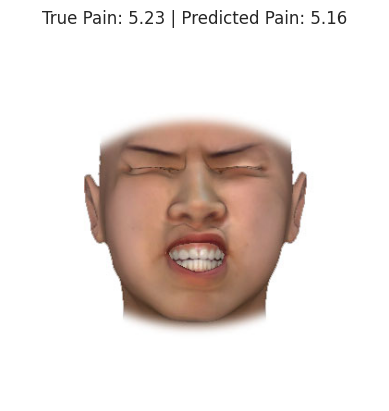

In [23]:
def predict_random_image(model_path, test_data, transform, device):
    model = models.resnet18(pretrained=True)
    model.fc = torch.nn.Linear(model.fc.in_features, 1)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()

    random_idx = random.randint(0, len(test_data) - 1)
    img_path, true_label = test_data[random_idx]

    original_image = Image.open(img_path).convert('RGB')
    transformed_image = transform(original_image).unsqueeze(0).to(device)

    with torch.no_grad():
        predicted_label = model(transformed_image)
        predicted_label = predicted_label.item()

    plt.imshow(original_image)
    plt.axis('off')
    plt.title(f"True Pain: {true_label:.2f} | Predicted Pain: {predicted_label:.2f}")
    plt.show()

predict_random_image(MODEL_SAVE_PATH, test_data, transform, device)


# **dùng tensorflow**

# **pain_labels.csv**

Sử dụng face_features: ['Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise', 'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft', 'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold', 'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight', 'LookUp', 'aah', 'big aah', 'ee', 'eh', 'i', 'K', 'N', 'oh', 'R', 'th', 'W']
Tổng ảnh hợp lệ: 128
Train: 88 | Val: 16 | Test: 24
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - loss: 4.3297 - mae: 4.8296
Epoch 1: val_loss improved from inf to 1.43975, saving model to best_pain_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - loss: 4.2097 - mae: 4.7096 - val_loss: 1.4398 - val_mae: 1.9398 - learning_rate: 0.0010
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - loss: 1.1889 - mae: 1.6534
Epoch 2: val_loss improved from 1.43975 to 0.48292, saving model to best_pain_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 978ms/step - loss: 1.1746 - mae: 1.6340 - val_loss: 0.4829 - val_mae: 0.9642 - learning_rate: 0.0010
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - loss: 1.2756 - mae: 1.7089
Epoch 3: val_loss improved from 0.48292 to 0.18644, saving model to best_pain_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 916ms/step - loss: 1.2576 - mae: 1.6908 - val_loss: 0.1864 - val_mae: 0.5554 - learning_rate: 0.0010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - loss: 0.8468 - mae: 1.2393
Epoch 4: val_loss did not improve from 0.18644
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 682ms/step - loss: 0.8540 - mae: 1.2506 - val_loss: 1.0651 - val_mae: 1.5651 - learning_rate: 0.0010
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - loss: 0.8068 - mae: 1.2288
Epoch 5: val_loss did not improve from 0.18644
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.8029 - mae: 1.2244 - val_loss: 0.5024 - val_mae: 0.9783 - learning_rate: 0.0010
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - loss: 0.7515 - mae: 1.1477
Epoch 6: val_loss improved from 0.18644 to 0.06402, saving model to best_pain_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 906ms/step - loss: 0.7548 - mae: 1.1519 - val_loss: 0.0640 - val_mae: 0.3315 - learning_rate: 0.0010
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - loss: 0.6928 - mae: 1.0808
Epoch 7: val_loss did not improve from 0.06402
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - loss: 0.6867 - mae: 1.0776 - val_loss: 0.3163 - val_mae: 0.7551 - learning_rate: 0.0010
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - loss: 0.5465 - mae: 0.9561
Epoch 8: val_loss did not improve from 0.06402
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 664ms/step - loss: 0.5458 - mae: 0.9556 - val_loss: 0.8708 - val_mae: 1.3686 - learning_rate: 0.0010
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - loss: 0.6296 - mae: 1.0404
Epoch 9: val_loss did not improve from 0.06402
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 675ms/step - loss: 0.6317 - mae: 1.0428 - val_loss: 0.5797 - val_mae: 1.0649 - learning_rate: 0.0010
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - loss: 0.7269 - mae: 1.1403
Epoch 10: val_loss did

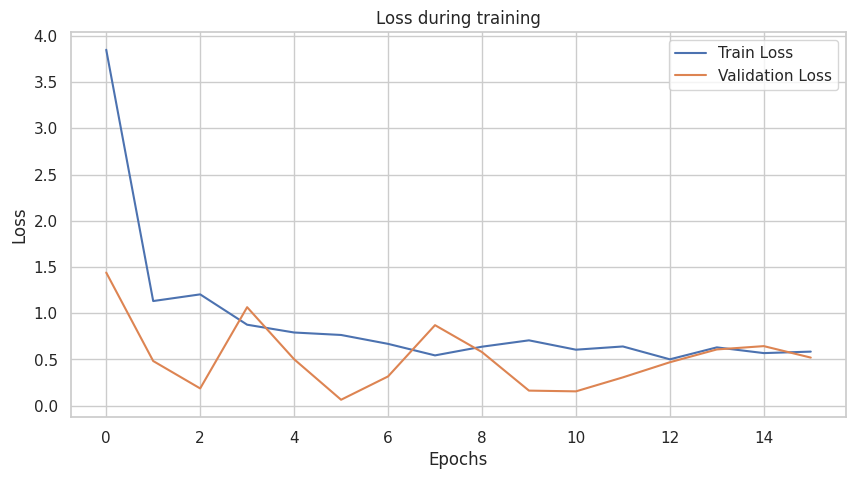

In [88]:
import os  # Duyệt file và thư mục
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.losses import Huber

# BƯỚC 1: ĐƯỜNG DẪN
IMAGE_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller"
CSV_PATH = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv"

# BƯỚC 2: ĐỌC CSV & CHUẨN HÓA
df = pd.read_csv(CSV_PATH)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(",", ".", regex=False)

emotion_features = [
    'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
]

face_features = [
    'Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise',
    'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft',
    'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold',
    'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight',
    'LookUp', 'aah', 'B,M,P', 'big aah', 'ch,J,sh', 'D,S,T', 'ee', 'eh', 'F,V',
    'i', 'K', 'N', 'oh', 'ooh,Q', 'R', 'th', 'W'
]
# Lọc các cột thực sự tồn tại
face_features = [col for col in face_features if col in df.columns]
print("Sử dụng face_features:", face_features)

df = df.dropna(subset=['ImageFile', 'PainRating'] + emotion_features + face_features)

# BƯỚC 3: LOAD DỮ LIỆU
X_img, X_emotion, X_face, y, img_folder_names = [], [], [], [], []
for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(root, file)
            img_name = file
            if "_" in img_name:
                image_file_part = img_name.split("_")[-1]
                label_row = df[df['ImageFile'] == image_file_part]
                if not label_row.empty:
                    try:
                        img = load_img(img_path, target_size=(128, 128))
                        img_array = img_to_array(img) / 255.0
                        emotion_data = label_row[emotion_features].values[0]
                        face_data = label_row[face_features].values[0]
                        pain = label_row['PainRating'].values[0]
                        X_img.append(img_array)
                        X_emotion.append(emotion_data)
                        X_face.append(face_data)
                        y.append(pain)
                        folder_name = os.path.basename(os.path.dirname(img_path))
                        img_folder_names.append(folder_name)
                    except Exception as e:
                        print(f"❌ Lỗi xử lý ảnh {file}: {e}")

X_img = np.array(X_img)
X_emotion = np.array(X_emotion)
X_face = np.array(X_face)
y = np.array(y)
img_folder_names = np.array(img_folder_names)
print("Tổng ảnh hợp lệ:", len(X_img))

# BƯỚC 4: CHIA DỮ LIỆU (THEO THƯ MỤC)
all_folders = sorted(set(img_folder_names))
train_folders, temp_folders = train_test_split(all_folders, test_size=0.3, random_state=42)
val_folders, test_folders = train_test_split(temp_folders, test_size=0.5, random_state=42)

def split_by_folder(folders, img_folders, *arrays):
    results = [[] for _ in arrays]
    for i, folder in enumerate(img_folders):
        if folder in folders:
            for res, arr in zip(results, arrays): res.append(arr[i])
    return map(np.array, results)

X_img_train, X_emo_train, X_face_train, y_train = split_by_folder(train_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_val, X_emo_val, X_face_val, y_val = split_by_folder(val_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_test, X_emo_test, X_face_test, y_test = split_by_folder(test_folders, img_folder_names, X_img, X_emotion, X_face, y)
print("Train:", len(X_img_train), "| Val:", len(X_img_val), "| Test:", len(X_img_test))

# BƯỚC 5: XÂY DỰNG MÔ HÌNH (MULTI-INPUT)
img_input = Input(shape=(128,128,3), name='ImageInput')
x = preprocess_input(img_input)
base_model = EfficientNetB0(include_top=False, input_tensor=x, pooling='avg', weights='imagenet')
base_model.trainable = False
x = base_model.output
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

emotion_input = Input(shape=(len(emotion_features),), name='EmotionInput')
e = Dense(128, activation='relu')(emotion_input)
e = Dropout(0.3)(e)
e = Dense(64, activation='relu')(e)

face_input = Input(shape=(len(face_features),), name='FaceInput')
f = Dense(128, activation='relu')(face_input)
f = Dropout(0.3)(f)
f = Dense(64, activation='relu')(f)

combined = Concatenate()([x, e, f])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.4)(z)
z = Dense(64, activation='relu')(z)
z = Dropout(0.2)(z)
output = Dense(1, name='PainOutput')(z)

model = Model(inputs=[img_input, emotion_input, face_input], outputs=output)
model.compile(optimizer='adam', loss=Huber(delta=1.0), metrics=['mae'])

# BƯỚC 6: TRAIN MÔ HÌNH
# Khởi tạo các callback để hỗ trợ quá trình huấn luyện:
# callbacks = [
#     EarlyStopping(
#         monitor='val_loss',    # Theo dõi giá trị validation loss
#         patience=10,           # Nếu 10 epoch liên tiếp không giảm -> dừng sớm
#         restore_best_weights=True  # Phục hồi lại trọng số tốt nhất
#     ),
#     ReduceLROnPlateau(
#         monitor='val_loss',    # Theo dõi giá trị validation loss
#         factor=0.5,            # Nếu loss không giảm, giảm learning rate đi 1/2
#         patience=5,            # Sau 5 epoch không cải thiện thì giảm
#         verbose=1              # In ra thông báo khi learning rate thay đổi
#     )
# ]

# Định nghĩa callbacks mới: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_pain_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# Bắt đầu huấn luyện mô hình
history = model.fit(
    [X_img_train, X_emo_train, X_face_train], y_train,
    validation_data=([X_img_val, X_emo_val, X_face_val], y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# BƯỚC 7: ĐÁNH GIÁ MÔ HÌNH
test_loss, test_mae = model.evaluate(
    [X_img_test, X_emo_test, X_face_test], y_test,
    verbose=1
)
print(f"Test Loss: {test_loss:.4f} | Test MAE: {test_mae:.4f}")

# BƯỚC 8: VẼ BIỂU ĐỒ LOSS/MAE
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Nếu cần vẽ thêm MAE, bạn cũng có thể thêm:
# plt.plot(history.history['mae'], label='Train MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


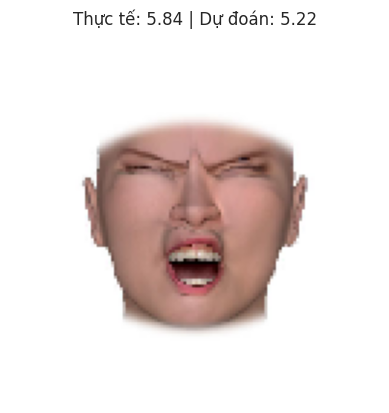

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


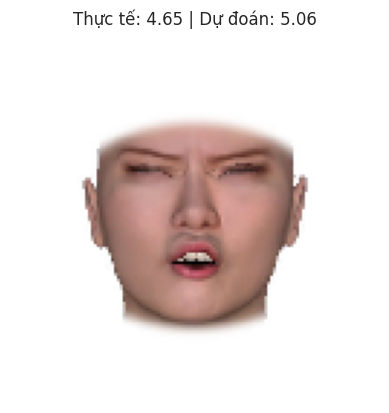

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


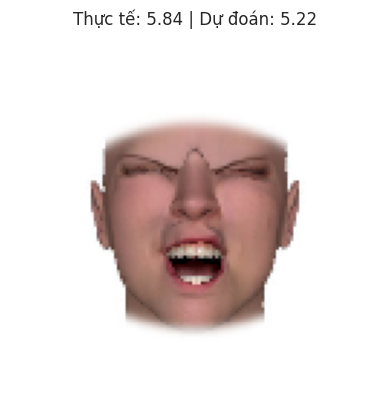

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


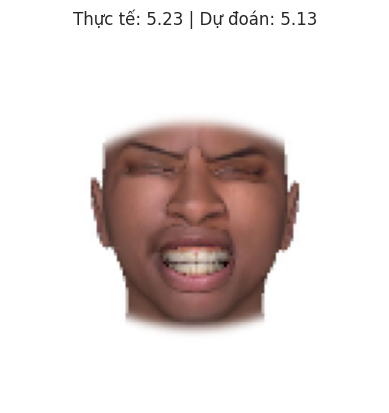

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


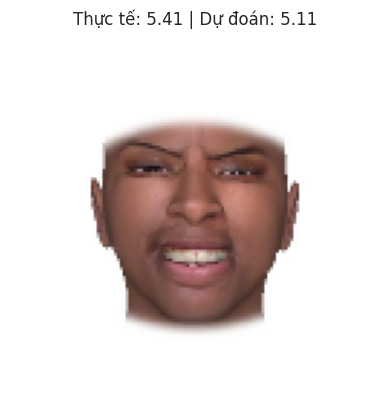

In [87]:
import random

for _ in range(5):  # test 5 mẫu random
    idx = random.randint(0, len(X_img_test) - 1)
    img_sample = np.expand_dims(X_img_test[idx], axis=0)
    emo_sample = np.expand_dims(X_emo_test[idx], axis=0)
    face_sample = np.expand_dims(X_face_test[idx], axis=0)

    pred = model.predict([img_sample, emo_sample, face_sample])[0][0]

    plt.imshow(X_img_test[idx])
    plt.axis('off')
    plt.title(f"Thực tế: {y_test[idx]:.2f} | Dự đoán: {pred:.2f}")
    plt.show()


Chuyển merged_output.xlsx sang output.xlsx

In [ ]:
import pandas as pd

# Đường dẫn đến tệp .xlsx
input_file = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_output.xlsx'  # Thay bằng đường dẫn tệp của bạn
output_file = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.xlsx'  # Tên tệp .csv đầu ra


# Đọc tệp .xlsx
df = pd.read_excel(input_file)

df = df.drop(columns=['ResponseId'])

df.head()

# Lưu dưới dạng .csv
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"Đã chuyển đổi {input_file} sang {output_file}")


Đã chuyển đổi /content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_output.xlsx sang /content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.xlsx


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# Tùy chỉnh để hiển thị biểu đồ đẹp hơn
sns.set(style="whitegrid")

Mounted at /content/drive


# **output.csv**

# **dùng tensorflow**

In [ ]:
import os  # Duyệt file và thư mục
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.losses import Huber

# BƯỚC 1: ĐƯỜNG DẪN
IMAGE_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller"
CSV_PATH = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.csv"

# BƯỚC 2: ĐỌC CSV & CHUẨN HÓA
df = pd.read_csv(CSV_PATH)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(",", ".", regex=False)

emotion_features = [
    'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
]

face_features = [
    'Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise',
    'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft',
    'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold',
    'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight',
    'LookUp', 'aah', 'B,M,P', 'big aah', 'ch,J,sh', 'D,S,T', 'ee', 'eh', 'F,V',
    'i', 'K', 'N', 'oh', 'ooh,Q', 'R', 'th', 'W'
]
# Lọc các cột thực sự tồn tại
face_features = [col for col in face_features if col in df.columns]
print("Sử dụng face_features:", face_features)

df = df.dropna(subset=['ImageFile', 'PainRating'] + emotion_features + face_features)

# BƯỚC 3: LOAD DỮ LIỆU
X_img, X_emotion, X_face, y, img_folder_names = [], [], [], [], []
for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(root, file)
            img_name = file
            if "_" in img_name:
                image_file_part = img_name.split("_")[-1]
                label_row = df[df['ImageFile'] == image_file_part]
                if not label_row.empty:
                    try:
                        img = load_img(img_path, target_size=(128, 128))
                        img_array = img_to_array(img) / 255.0
                        emotion_data = label_row[emotion_features].values[0]
                        face_data = label_row[face_features].values[0]
                        pain = label_row['PainRating'].values[0]
                        X_img.append(img_array)
                        X_emotion.append(emotion_data)
                        X_face.append(face_data)
                        y.append(pain)
                        folder_name = os.path.basename(os.path.dirname(img_path))
                        img_folder_names.append(folder_name)
                    except Exception as e:
                        print(f"❌ Lỗi xử lý ảnh {file}: {e}")

X_img = np.array(X_img)
X_emotion = np.array(X_emotion)
X_face = np.array(X_face)
y = np.array(y)
img_folder_names = np.array(img_folder_names)
print("Tổng ảnh hợp lệ:", len(X_img))

# BƯỚC 4: CHIA DỮ LIỆU (THEO THƯ MỤC)
all_folders = sorted(set(img_folder_names))
train_folders, temp_folders = train_test_split(all_folders, test_size=0.3, random_state=42)
val_folders, test_folders = train_test_split(temp_folders, test_size=0.5, random_state=42)

def split_by_folder(folders, img_folders, *arrays):
    results = [[] for _ in arrays]
    for i, folder in enumerate(img_folders):
        if folder in folders:
            for res, arr in zip(results, arrays): res.append(arr[i])
    return map(np.array, results)

X_img_train, X_emo_train, X_face_train, y_train = split_by_folder(train_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_val, X_emo_val, X_face_val, y_val = split_by_folder(val_folders, img_folder_names, X_img, X_emotion, X_face, y)
X_img_test, X_emo_test, X_face_test, y_test = split_by_folder(test_folders, img_folder_names, X_img, X_emotion, X_face, y)
print("Train:", len(X_img_train), "| Val:", len(X_img_val), "| Test:", len(X_img_test))

# BƯỚC 5: XÂY DỰNG MÔ HÌNH (MULTI-INPUT)
img_input = Input(shape=(128,128,3), name='ImageInput')
x = preprocess_input(img_input)
base_model = EfficientNetB0(include_top=False, input_tensor=x, pooling='avg', weights='imagenet')
base_model.trainable = False
x = base_model.output
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

emotion_input = Input(shape=(len(emotion_features),), name='EmotionInput')
e = Dense(128, activation='relu')(emotion_input)
e = Dropout(0.3)(e)
e = Dense(64, activation='relu')(e)

face_input = Input(shape=(len(face_features),), name='FaceInput')
f = Dense(128, activation='relu')(face_input)
f = Dropout(0.3)(f)
f = Dense(64, activation='relu')(f)

combined = Concatenate()([x, e, f])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.4)(z)
z = Dense(64, activation='relu')(z)
z = Dropout(0.2)(z)
output = Dense(1, name='PainOutput')(z)

model = Model(inputs=[img_input, emotion_input, face_input], outputs=output)
model.compile(optimizer='adam', loss=Huber(delta=1.0), metrics=['mae'])

# BƯỚC 6: TRAIN MÔ HÌNH
# Khởi tạo các callback để hỗ trợ quá trình huấn luyện:
# callbacks = [
#     EarlyStopping(
#         monitor='val_loss',    # Theo dõi giá trị validation loss
#         patience=10,           # Nếu 10 epoch liên tiếp không giảm -> dừng sớm
#         restore_best_weights=True  # Phục hồi lại trọng số tốt nhất
#     ),
#     ReduceLROnPlateau(
#         monitor='val_loss',    # Theo dõi giá trị validation loss
#         factor=0.5,            # Nếu loss không giảm, giảm learning rate đi 1/2
#         patience=5,            # Sau 5 epoch không cải thiện thì giảm
#         verbose=1              # In ra thông báo khi learning rate thay đổi
#     )
# ]

# Định nghĩa callbacks mới: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_pain_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# Bắt đầu huấn luyện mô hình
history = model.fit(
    [X_img_train, X_emo_train, X_face_train], y_train,
    validation_data=([X_img_val, X_emo_val, X_face_val], y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# BƯỚC 7: ĐÁNH GIÁ MÔ HÌNH
test_loss, test_mae = model.evaluate(
    [X_img_test, X_emo_test, X_face_test], y_test,
    verbose=1
)
print(f"Test Loss: {test_loss:.4f} | Test MAE: {test_mae:.4f}")

# BƯỚC 8: VẼ BIỂU ĐỒ LOSS/MAE
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Nếu cần vẽ thêm MAE, bạn cũng có thể thêm:
# plt.plot(history.history['mae'], label='Train MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')


In [ ]:
import random

for _ in range(5):  # test 5 mẫu random
    idx = random.randint(0, len(X_img_test) - 1)
    img_sample = np.expand_dims(X_img_test[idx], axis=0)
    emo_sample = np.expand_dims(X_emo_test[idx], axis=0)
    face_sample = np.expand_dims(X_face_test[idx], axis=0)

    pred = model.predict([img_sample, emo_sample, face_sample])[0][0]

    plt.imshow(X_img_test[idx])
    plt.axis('off')
    plt.title(f"Thực tế: {y_test[idx]:.2f} | Dự đoán: {pred:.2f}")
    plt.show()


# **Clean DelawarePainDatabase_StimulusCharacterization_forOSF.xlsx**


In [16]:
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DelawarePainDatabase_StimulusCharacterization_forOSF.xlsx"
xls = pd.ExcelFile(file_path)

df_RawNeutralData_DPD = pd.read_excel(xls, sheet_name="RawNeutralData_DPD")

df_RawNeutralData_DPD.info()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Columns: 7530 entries, RecordedDate to Unnamed: 7529
dtypes: datetime64[ns](1), float64(6856), int64(1), object(672)
memory usage: 35.4+ MB
